# [DA217] Metric and visualizations for happy path and deviations.

### 1. Sample Conversations

#### 1.1 Generate corpus

In [1]:
from toolkits.database_hooks.messages_corpus import dataset
import numpy as np

data = dataset('2022-07-01')
sample_numbers = data.df('userNumber').loc[data.df('messageType').isin(['opt-in request'])].unique()

N = 200
if len(sample_numbers) > N:
    sample_numbers = np.random.choice(sample_numbers,size=(N,),replace=False)

data = data.df().loc[data.df('userNumber').isin(sample_numbers) & data.df('direction').isin(['outbound'])].sort_values(by=['userNumber','createdAt'])
data.index = range(len(data))
len(data)

/Users/zacharyrosen/anaconda3/envs/ml2/lib/python3.9/site-packages/google/auth/_default.py:79: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Users/zacharyrosen/anaconda3/envs/ml2/lib/python3.9/site-packages/google/auth/_default.py:79: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For m

1283

#### 1.2 Convert Conversations to 2D States/Message Types

In [2]:
from proj.WorkFlows.DA214.DA217.mod.transitions import states

sample = states(data['messageType'].values,'opt-in request')
s = ~((sample.t == np.array([[None,None]])).sum(axis=-1) == 2)

### 2. Compare to Existing Happy Path State Transitions

#### 2.1 Set up metric class

In [3]:
import pandas as pd
from proj.WorkFlows.DA214.DA217.mod.transitions import metric

happy_df = pd.read_csv("/Users/zacharyrosen/workspace/proj/WorkFlows/DA214/DA217/data/StateTransitions.csv")
happy_path = happy_df[['start', 'end']].values

In [4]:
m = metric(happy_path)

#### 2.2 Feed Sampled Conversations to Metric Class

In [5]:
res = m(sample.t)
res[0], res[-1][s].mean()

(0.12488350419384903, 0.2718052738336714)

### 3. Visualizing Difference from Happy Path

In [10]:
from proj.WorkFlows.DA214.DA217.mod.transitionsVisualizer import *

G,nC,eC,eW,eF = graph(happy_path,sample.t[s],edge_max=5)

# plt.figure(figsize=(14,8.5))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True,node_color=nC,edge_color=eC)
# plt.show()

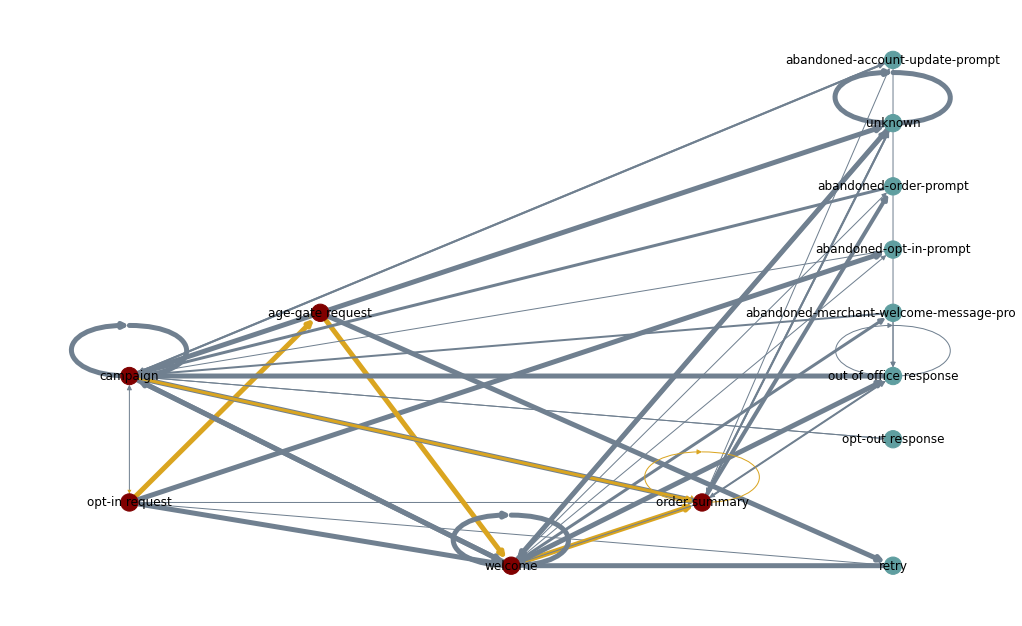

In [11]:
levels = happy_df['order'].values.astype(int)

tree = [happy_path[levels==0,0]]
for lvl in np.unique(levels):
    tree += [happy_path[levels==lvl,1]]

pos = dict()
for i,subtree in enumerate(tree):
    for j,node in enumerate(subtree):
        pos[node] = np.array([i,j],dtype=float) * 5
pos.update({node: np.array([len(tree),i]) * 5 for i,node in enumerate(set(sample.t.reshape(-1)).difference(set(np.unique(happy_path))))})
pos['opt-in request'][0] = 0
plt.figure(figsize=(14,8.5))
nx.draw(G, pos, with_labels=True,node_color=nC,edge_color=eC,width=eF)
plt.show()